In [2]:
import pandas
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
import scipy.stats as spstats
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import Ridge 
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import PolynomialFeatures


In [1]:
TargetData = pandas.read_csv("/2010_RD_Scoreboard_Global_cleaned_constructed_done.csv")

NameError: name 'pandas' is not defined

In [6]:
print(TargetData.shape)
print(TargetData.dtypes)

(1000, 37)
Company                                object
Company ID                              int64
Country                                object
Country GDP $                         float64
Not IFRS                               object
Industry group                          int64
ICB code                                int64
Industry description                   object
Listing status                         object
2009 R&D investment                   float64
1 Yr R&D investment growth%           float64
4 Yr R&D investment growth%           float64
R&D investment / operation profit%    float64
R&D investment / sales%               float64
R&D + capex / sales%                  float64
Operating profit                      float64
If made profit                         object
1 Yr operating profit%                float64
4 Yr operating profit%                float64
Operating profit / sales%             float64
Sales                                 float64
1 Yr sales growth%     

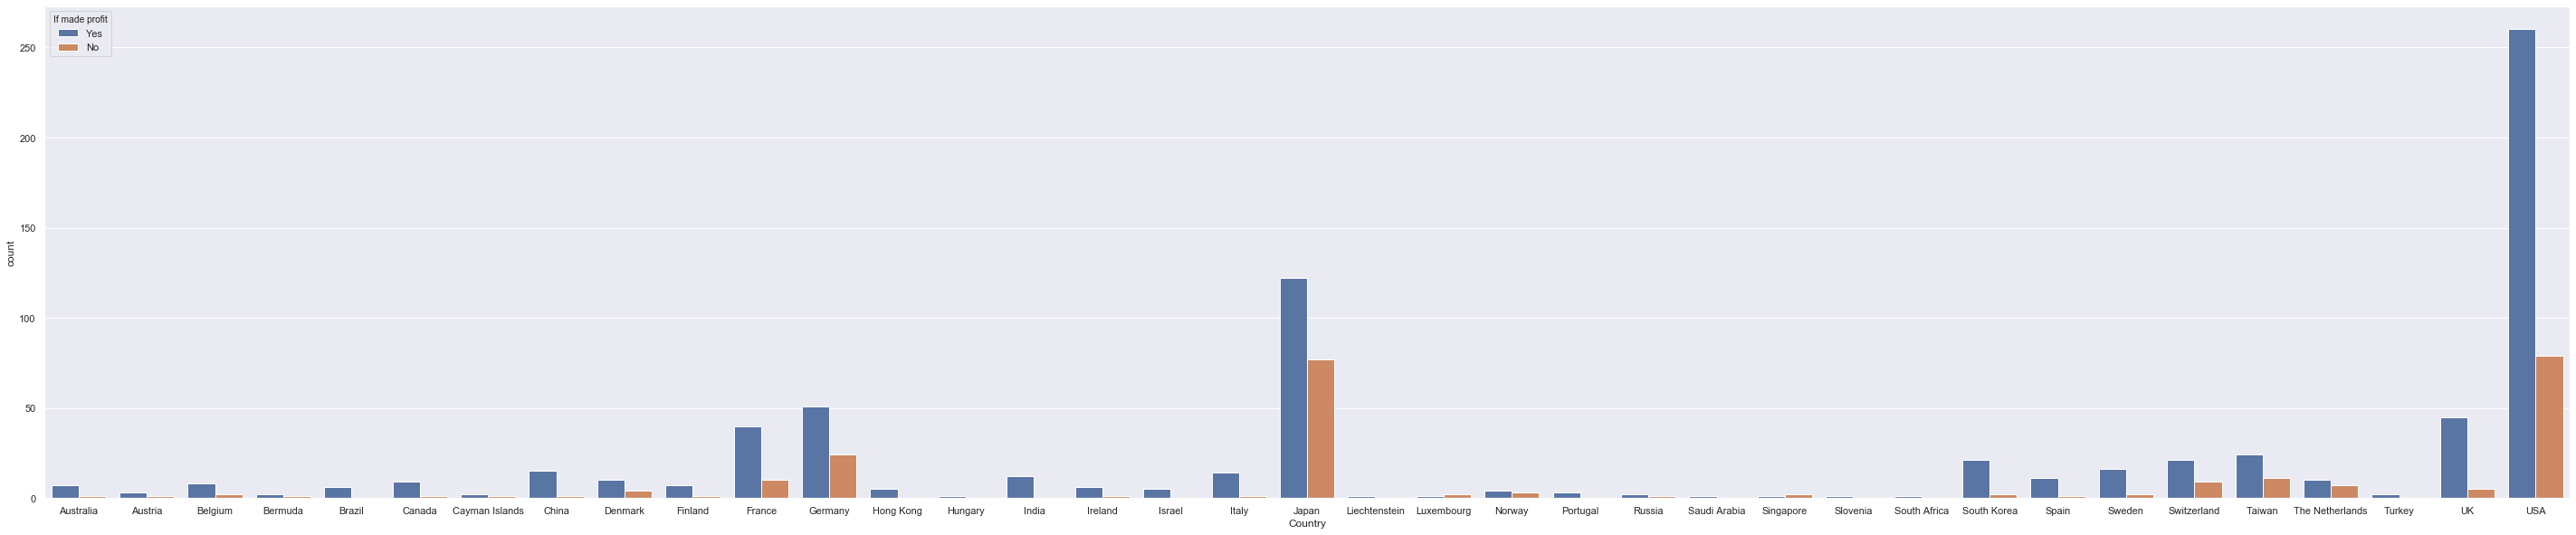

In [7]:
# Visualization
sns.set(style='whitegrid', color_codes=True)
sns.set(rc={'figure.figsize':(50, 10)})
sns.countplot('Country',data=TargetData, hue='If made profit')

In [8]:
# find correlation between operating profit and each of the other columns

print(TargetData.corr()["Sales"])

Company ID                            0.167191
Country GDP $                        -0.089838
Industry group                       -0.127177
ICB code                             -0.157763
2009 R&D investment                   0.489713
1 Yr R&D investment growth%          -0.034729
4 Yr R&D investment growth%          -0.025615
R&D investment / operation profit%   -0.012983
R&D investment / sales%              -0.033567
R&D + capex / sales%                 -0.031598
Operating profit                      0.656417
1 Yr operating profit%                0.019252
4 Yr operating profit%                0.025541
Operating profit / sales%             0.029844
Sales                                 1.000000
1 Yr sales growth%                   -0.009949
4 Yr sales growth%                   -0.050142
Employees                             0.699871
1 Yr employees growth%               -0.013392
4 Yr employees growth%               -0.077272
R&D / employees                      -0.170141
1 Yr R&D / em

In [9]:
# Reduce the data: keep the profitable company

ProfitCompanyData = TargetData[TargetData["If made profit"]=="Yes"]
print(ProfitCompanyData.shape)

(750, 37)


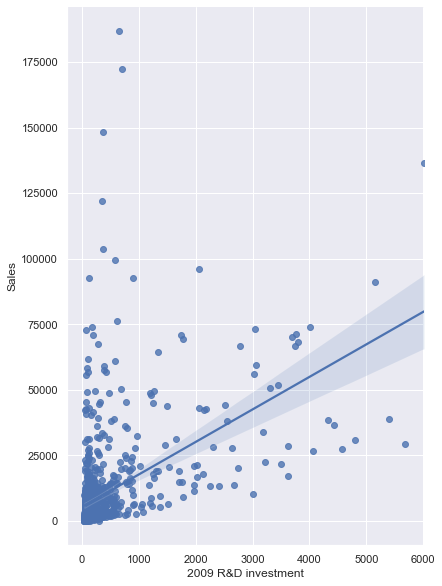

In [10]:
# Visuallization

sns.pairplot(TargetData, x_vars=['2009 R&D investment'], y_vars='Sales',kind="reg", height=8, aspect=0.7)
plt.show()

Text(0, 0.5, 'Frequency')

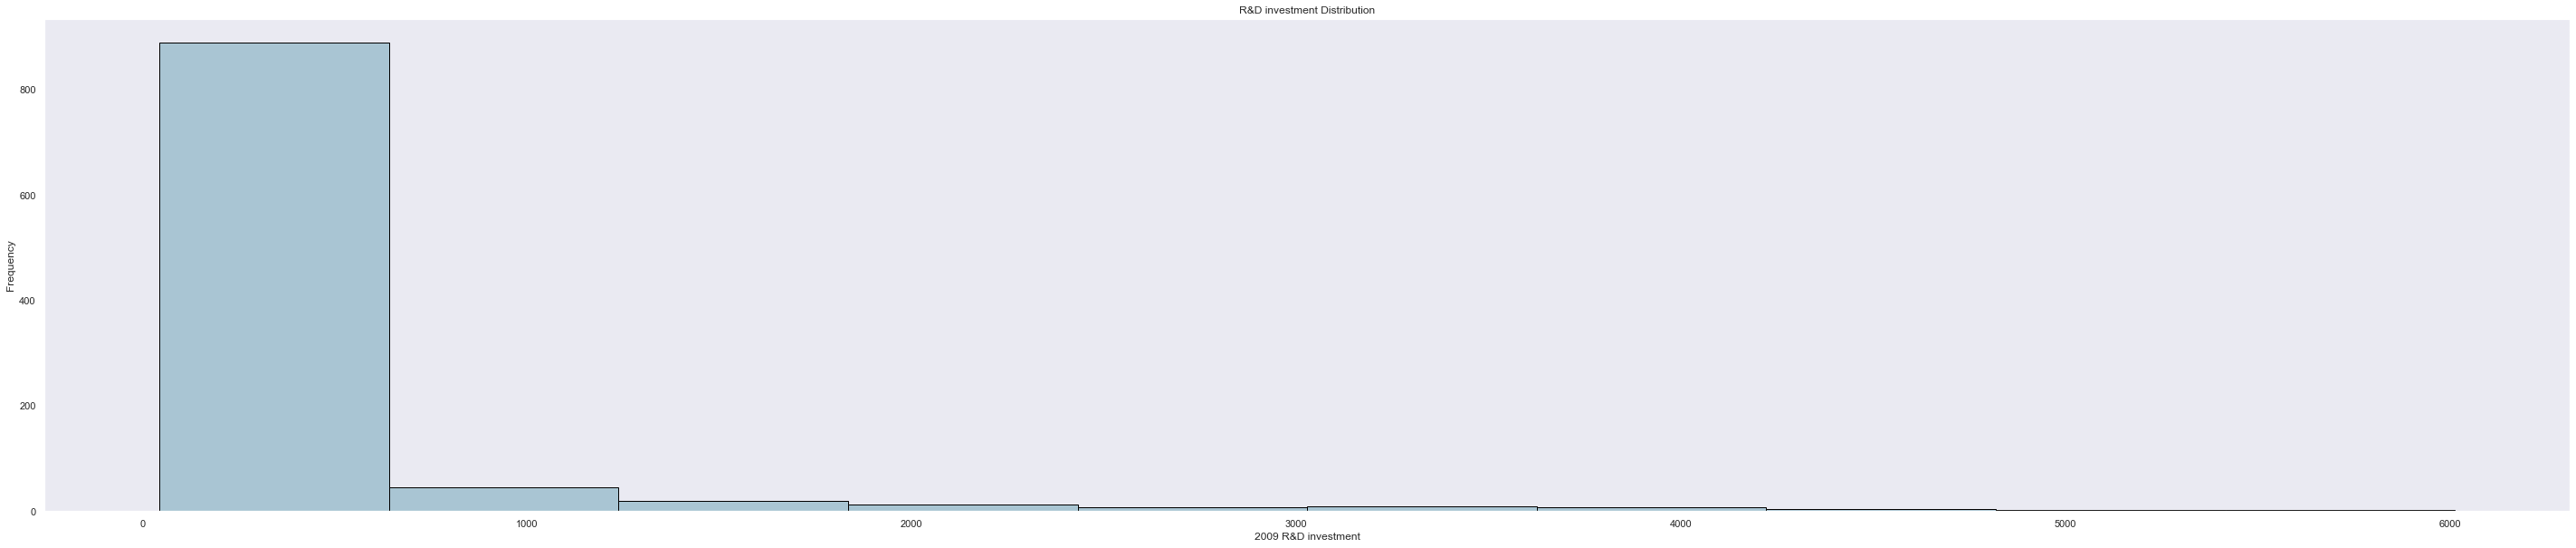

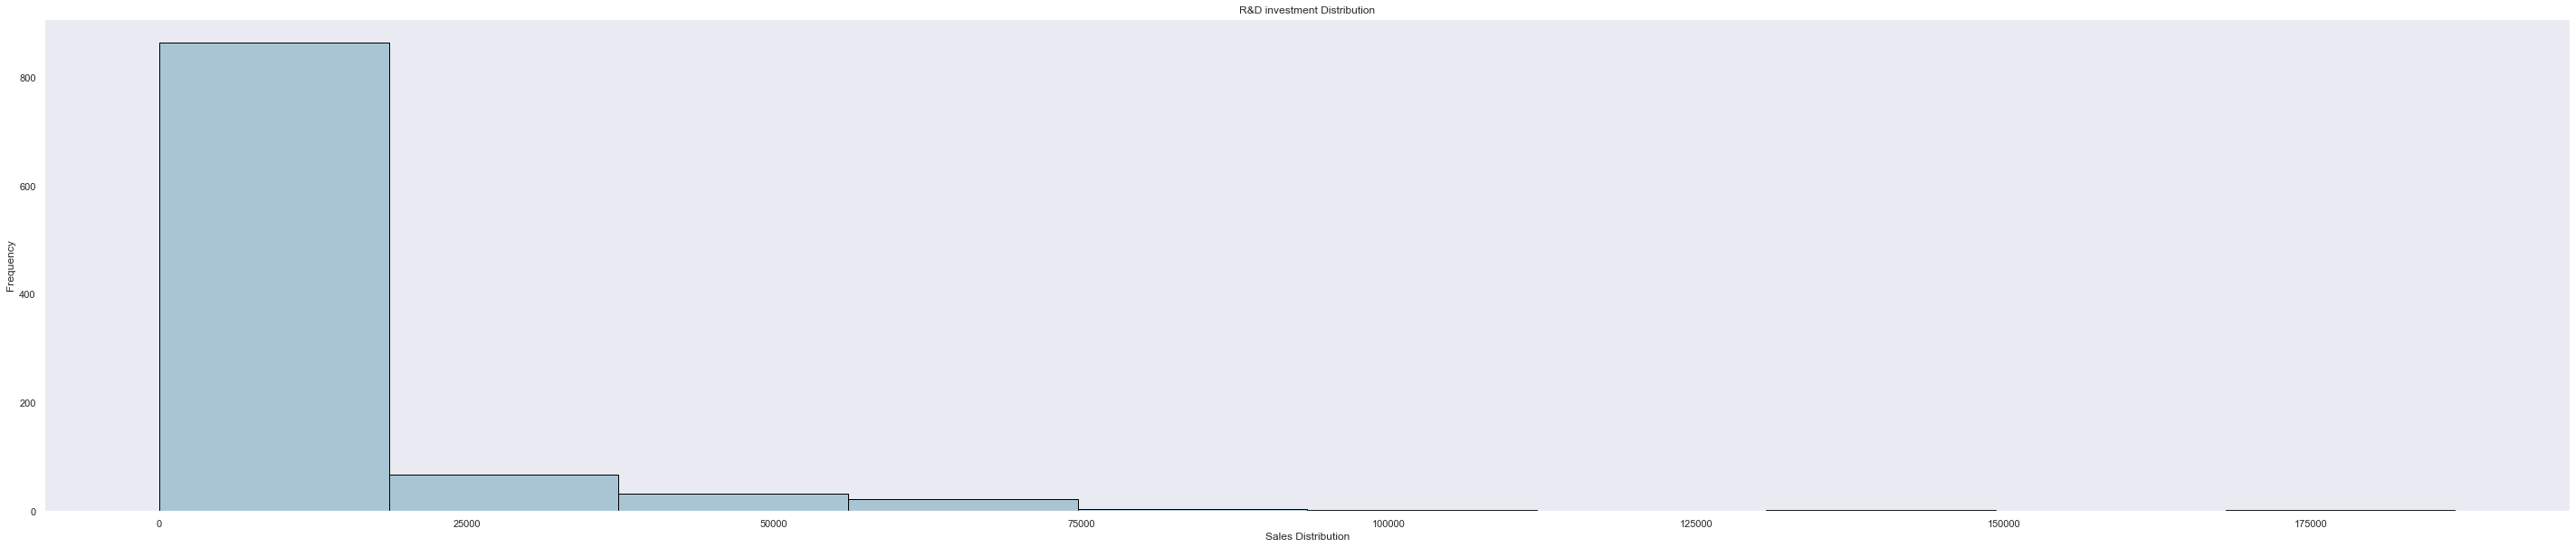

In [11]:
# Not clear, more visulizaiton

fig, ax = plt.subplots()
TargetData['2009 R&D investment'].hist(color='#A9C5D3',edgecolor='black',grid=False)
ax.set_title('R&D investment Distribution', fontsize=12)
ax.set_xlabel('2009 R&D investment', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

fig1, ax1 = plt.subplots()
TargetData['Sales'].hist(color='#A9C5D3',edgecolor='black',grid=False)
ax1.set_title('R&D investment Distribution', fontsize=12)
ax1.set_xlabel('Sales Distribution', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

In [12]:
# Use log to project the data
logData = TargetData

logData['2009 R&D investment_log'] = np.log((1+logData['2009 R&D investment']))
logData[['Company ID','2009 R&D investment','2009 R&D investment_log']].iloc[4:9]

logData['Sales_log'] = np.log((1+logData['Sales']))
logData[['Company ID','Sales','Sales_log']].iloc[4:9]

,Company ID,Sales,Sales_log
4,303,506.0,6.228511
5,403,2574.0,7.853605
6,473,387.0,5.961005
7,885,4033.0,8.302514
8,421,55.0,4.025352


Company ID                            0.304343
Country GDP $                        -0.238172
Industry group                       -0.366719
ICB code                             -0.285307
2009 R&D investment                   0.442767
1 Yr R&D investment growth%          -0.047738
4 Yr R&D investment growth%          -0.051760
R&D investment / operation profit%    0.009647
R&D investment / sales%              -0.234566
R&D + capex / sales%                 -0.234674
Operating profit                      0.452175
1 Yr operating profit%                0.083690
4 Yr operating profit%                0.042050
Operating profit / sales%             0.227570
Sales                                 0.673676
1 Yr sales growth%                   -0.020575
4 Yr sales growth%                   -0.079279
Employees                             0.628063
1 Yr employees growth%               -0.028579
4 Yr employees growth%               -0.118554
R&D / employees                      -0.548151
1 Yr R&D / em

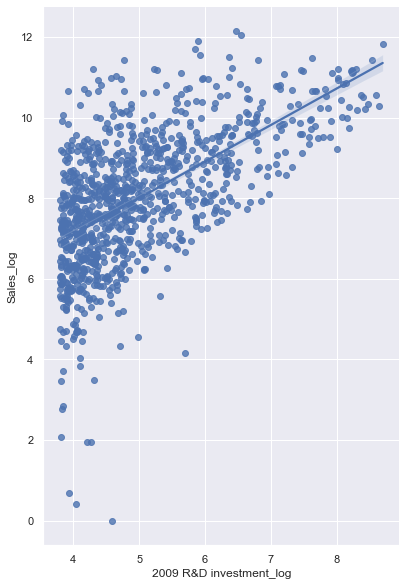

In [14]:
# Correlation in log data & visualization

print(logData.corr()["Sales_log"])
sns.pairplot(logData, x_vars=['2009 R&D investment_log'], y_vars='Sales_log',kind="reg", height=8, aspect=0.7)
plt.show()

# As can be seen, the correlation is higher

In [58]:
# Linear Reg
# Remove the columns which have less correlation with target
columnsl = logData.columns.tolist()
columnsl = [c for c in columnsl if c not in ["Sales_log",'Company', 'Company ID', 'Country', 'Country GDP $', 'Not IFRS', 'Industry group', 'ICB code', 'Industry description', 'Listing status', '2009 R&D investment', '1 Yr R&D investment growth%', '4 Yr R&D investment growth%', 'R&D investment / operation profit%', 'R&D investment / sales%', 'R&D + capex / sales%', 'Operating profit', 'If made profit', '1 Yr operating profit%', '4 Yr operating profit%', 'Operating profit / sales%', 'Sales', '1 Yr sales growth%', '4 Yr sales growth%', 'Employees', '1 Yr employees growth%', '4 Yr employees growth%', 'R&D / employees ', '1 Yr R&D / employees growth%', '4 Yr R&D / employees growth%', 'Sales outside region%', 'Market cap', 'Market cap change%', 'If market cap increase', 'R&D spend 2008', 'R&D spend 2007', 'R&D spend 2006', 'R&D spend 2005']]
targetl = "Sales_log"

print(columnsl)

['2009 R&D investment_log']


In [16]:
# Construct train and test sets
train = logData.sample(frac=0.8, random_state=1)
test = logData.loc[~logData.index.isin(train.index)]

print(train.shape)
print(test.shape)

(800, 39)
(200, 39)


In [17]:
# Reg process and error measurement

model = LinearRegression()
model.fit(train[columnsl], train[targetl])
predicitons = model.predict(test[columnsl])
print(mean_squared_error(predicitons, test[targetl]))

a, b = model.coef_, model.intercept_
print(a,b)

1.9461604469442058
[0.88963582] 3.5492783501535055


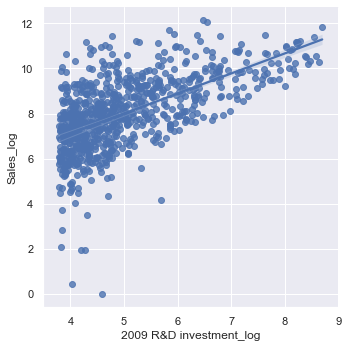

In [59]:
# Visualization
sns.lmplot(x="2009 R&D investment_log", y="Sales_log", data=train)

In [33]:
TargetDataNoMissing = pandas.read_csv("/Users/Zorro/Downloads/2010_RD_Scoreboard_Global_cleaned_constructed_done1.csv")

logData1 = TargetDataNoMissing

logData1['2009 R&D investment_log'] = np.log((1+logData['2009 R&D investment']))
logData1[['Company ID','2009 R&D investment','2009 R&D investment_log']].iloc[4:9]

logData1['Sales_log'] = np.log((1+logData['Sales']))
logData1[['Company ID','Sales','Sales_log']].iloc[4:9]

,Company ID,Sales,Sales_log
4,425,1.0,6.228511
5,230,1629.0,7.853605
6,261,5575.0,5.961005
7,115,85.0,8.302514
8,858,30249.0,4.025352


In [34]:
# Exploration1: Include more factors


E1columnsl = logData1.columns.tolist()
E1columnsl = [c for c in E1columnsl if c not in ['2009 R&D investment',"Sales_log",'Company', 'Company ID', 'Country', 'Country GDP $', 'Not IFRS', 'Industry group', 'ICB code', 'Industry description', 'Listing status', '1 Yr R&D investment growth%', '4 Yr R&D investment growth%', 'R&D investment / operation profit%', 'R&D investment / sales%', 'R&D + capex / sales%', 'If made profit', '1 Yr operating profit%', '4 Yr operating profit%', 'Operating profit / sales%', 'Sales', '1 Yr sales growth%', '4 Yr sales growth%', '1 Yr employees growth%', '4 Yr employees growth%', 'R&D / employees ', '1 Yr R&D / employees growth%', '4 Yr R&D / employees growth%', 'Sales outside region%', 'Market cap change%', 'If market cap increase', 'R&D spend 2007', 'R&D spend 2006', 'R&D spend 2005']]

E1targetl = "Sales_log"


print(E1columnsl)

['Operating profit', 'Employees', 'Market cap', 'R&D spend 2008', '2009 R&D investment_log']


In [69]:
# E1: Construct train and test sets
E1train = logData1.sample(frac=0.85, random_state=1)
E1test = logData1.loc[~logData1.index.isin(train.index)]

In [70]:
# E1: Reg process and error measurement

E1model = LinearRegression()
E1model.fit(E1train[E1columnsl], E1train[E1targetl])
predicitons = E1model.predict(E1test[E1columnsl])
print(mean_squared_error(predicitons, E1test[E1targetl]))

a, b = E1model.coef_, E1model.intercept_
print(a,b)
print(E1train[E1columnsl])
# As can be seen, the result is better with more related attributes in

1.4796228391621873
[ 2.11112734e-05 -2.28725893e-06  5.70461915e-07 -7.60117312e-04
  8.59585608e-01] 3.9920305209420452
     Operating profit  Employees  Market cap  R&D spend 2008  \
340             122.0      10000      2065.0           87.39   
810            5149.0      19835     95983.0         1729.64   
473            6085.0      30000     50539.0          129.42   
56              114.0       1600      2303.0           44.33   
617             431.0      34900      9571.0          261.32   
..                ...        ...         ...             ...   
606            -318.0       9482      1275.0          245.15   
193             541.0      17316      5457.0           60.37   
140              -7.0       1645       194.0           54.08   
416            -362.0       2163       703.0          108.38   
660            1590.0      19170     12502.0          318.92   

     2009 R&D investment_log  
340                 4.769922  
810                 5.144292  
473              

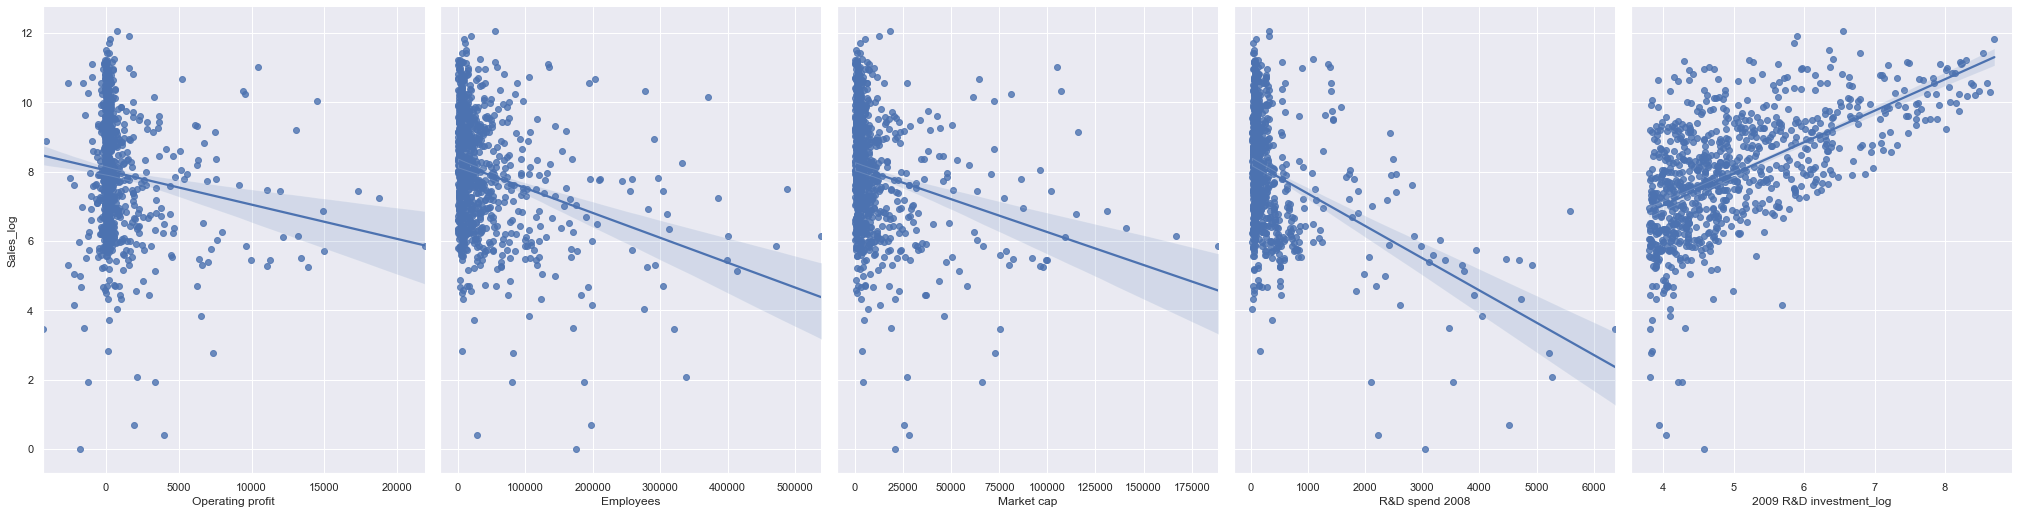

In [67]:
sns.pairplot(logData1, x_vars=E1columnsl, y_vars='Sales_log', height=7, aspect=0.8, kind='reg')  
plt.show()

In [55]:
# Exploration2: Random forest algorithm  
# Optimize the algorithm to 1

E2modelR = RandomForestRegressor(n_estimators=1000, min_samples_leaf=1, random_state=1)
E2modelR.fit(E1train[E1columnsl], E1train[E1targetl])
predictionsByRF = E2modelR.predict(E1test[E1columnsl])
print(mean_squared_error(predictionsByRF, E1test[E1targetl]))

# It seems not more effective in this case

1.289031674690822


In [198]:
# Exploration3: Ridge Regression
# Data prepration

E3columns = logData.columns.tolist()
E3columns = [c for c in E3columns if c not in ["Sales_log",'Employees','Market cap','Company', 'Company ID', 'Country', 'Country GDP $', 'Not IFRS', 'Industry group', 'ICB code', 'Industry description', 'Listing status', '1 Yr R&D investment growth%', '4 Yr R&D investment growth%', 'R&D investment / operation profit%', 'R&D investment / sales%', 'R&D + capex / sales%', 'If made profit', '1 Yr operating profit%', '4 Yr operating profit%', 'Operating profit / sales%', 'Sales', '1 Yr sales growth%', '4 Yr sales growth%', '1 Yr employees growth%', '4 Yr employees growth%', 'R&D / employees ', '1 Yr R&D / employees growth%', '4 Yr R&D / employees growth%', 'Sales outside region%', 'Market cap change%', 'If market cap increase', 'R&D spend 2008', 'R&D spend 2007', 'R&D spend 2006', 'R&D spend 2005']]
E3target = "Sales_log"

poly=PolynomialFeatures(3)
#E3columns=poly.fit_transform(E3columns)

E3train = logData.sample(frac=0.8, random_state=1)
E3test = logData.loc[~logData.index.isin(train.index)]

In [199]:
clf=Ridge(alpha=1.0,fit_intercept = True)
clf.fit(E3train[E3columns], E3train[E3target])
clf.score(test[E3columns],test[E3target])

0.42280725688104903

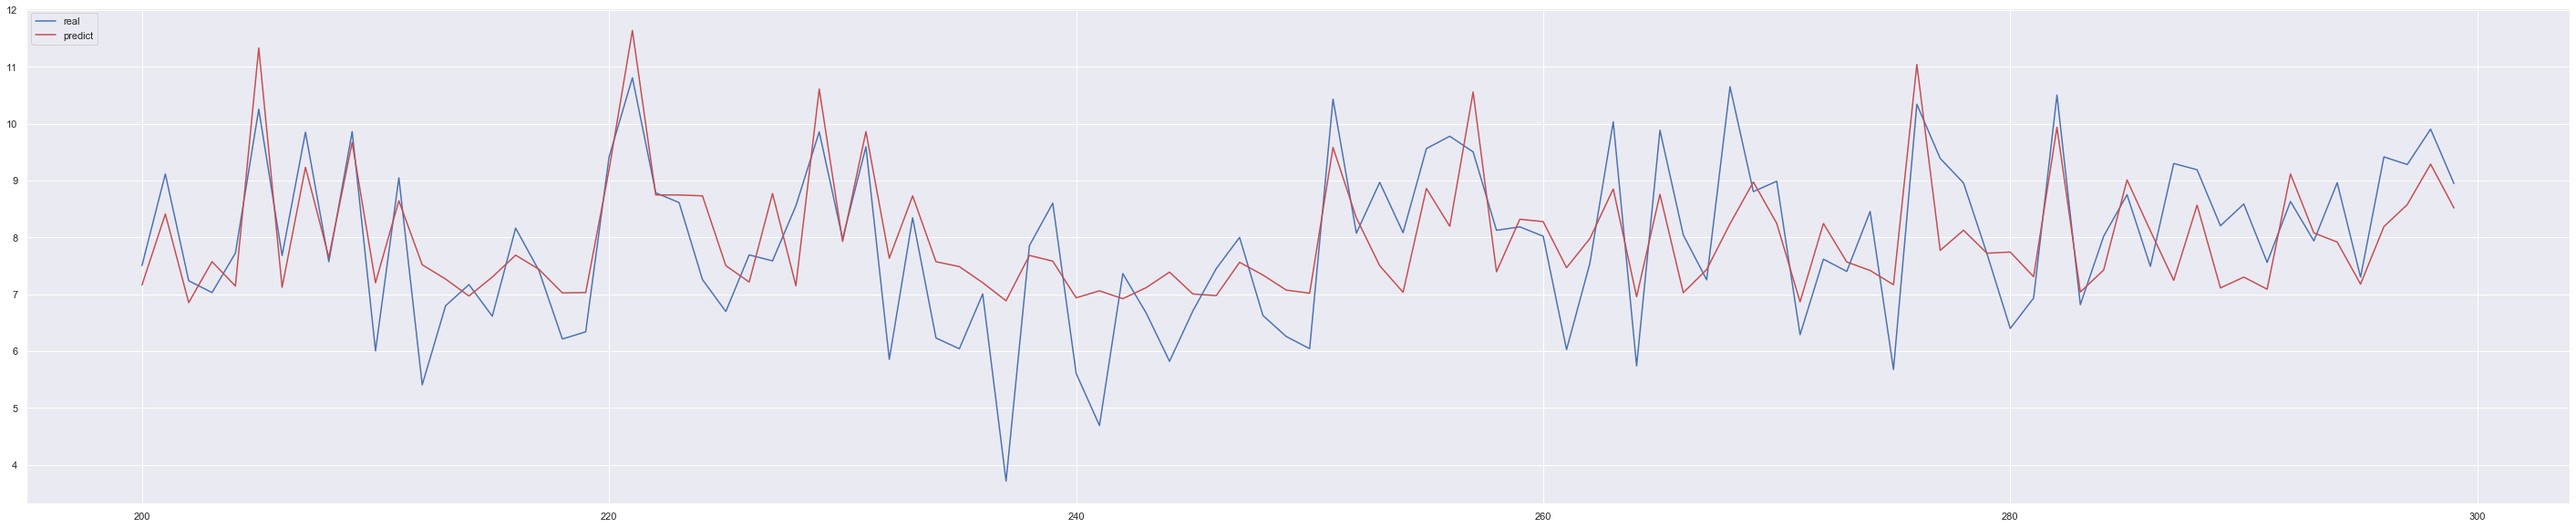

In [200]:
start=200
end=300
y_pre=clf.predict(E3train[E3columns])
time=np.arange(start,end)
plt.plot(time,E3train[E3target][start:end],'b', label="real")
plt.plot(time,y_pre[start:end],'r', label='predict')
plt.legend(loc='upper left') 
plt.show()